# Lecture 5: perspectives

## Content

* summary of lecture 4
* `scipy`:
    * optimisation
    * distributions
* read/write files
* speeeeeeeed with `numba`
* what more?

## Summary of lecture 4

* plotting with `matplotlib`
* data science: `pandas`
    * the `DataFrame`
    * loading data

* standard operations

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [4]:
x = np.linspace(0,10,100)

In [8]:
y = x**2

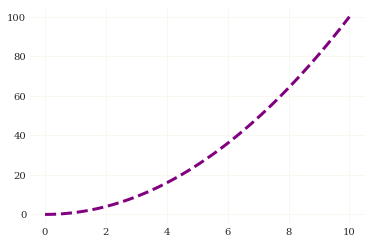

In [12]:
plt.plot(x,y, '--', lw=3, color='purple')

## Numerical Programming with `scipy`


Let's just cover some simple examples.

### Statistics and distributions

Let's use ``scipy.stats`` to generate some data from the Beta distribution

In [14]:
from scipy.stats import beta

In [18]:
import scipy.stats as ss

In [19]:
ss.beta

In [20]:
beta

In [22]:
q = beta(5,5)

In [27]:
obs = q.rvs(2000)

In [28]:
np.shape(obs)

(2000,)

Now let's histogram it and compare it to the original density

(array([  2.,   3.,   6.,  10.,  14.,  17.,  17.,  20.,  47.,  46.,  51.,
         53.,  54.,  65.,  84.,  69.,  91.,  80., 118., 109., 103., 111.,
         97.,  94.,  84.,  90.,  83.,  72.,  59.,  50.,  50.,  45.,  30.,
         23.,  21.,   8.,  10.,   7.,   3.,   4.]),
 array([0.07701622, 0.09785211, 0.11868801, 0.13952391, 0.1603598 ,
        0.1811957 , 0.2020316 , 0.2228675 , 0.24370339, 0.26453929,
        0.28537519, 0.30621108, 0.32704698, 0.34788288, 0.36871878,
        0.38955467, 0.41039057, 0.43122647, 0.45206236, 0.47289826,
        0.49373416, 0.51457006, 0.53540595, 0.55624185, 0.57707775,
        0.59791365, 0.61874954, 0.63958544, 0.66042134, 0.68125723,
        0.70209313, 0.72292903, 0.74376493, 0.76460082, 0.78543672,
        0.80627262, 0.82710851, 0.84794441, 0.86878031, 0.88961621,
        0.9104521 ]),
 <a list of 40 Patch objects>)

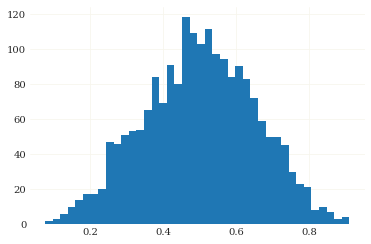

In [31]:
fig, ax = plt.subplots()
ax.hist(obs, bins=40)

In [32]:
type(q)

scipy.stats._distn_infrastructure.rv_frozen

Other methods of the distribution `q`

In [34]:
q.cdf(0.5)

0.5000000000000001

In [36]:
q.pdf(0.5)

2.460937500000001

In [37]:
q.mean()

0.5

### Roots and fixed points

Let's choose an arbitrary function to work with

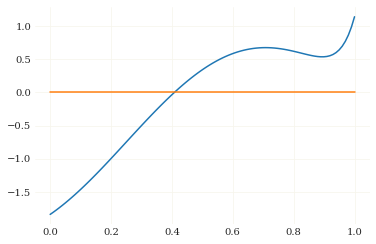

In [42]:
fig, ax = plt.subplots()

def f(x):
     return np.sin(4 * (x - 0.25)) + x + x**20 - 1

x = np.linspace(0, 1, 100)
ax.plot(x, f(x))
ax.plot(x, 0 * x)

In [41]:
from scipy.optimize import bisect

In [44]:
bisect(f, 0, 1)

0.4082935042806639

In [46]:
from scipy.optimize import newton

In [48]:
newton(f, 0.2)

0.40829350427935673

In [50]:
newton(f, 0.7)

0.7001700000000279

In [51]:
f(0.7)

0.6746455535411715

Here we see that the algorithm gets it wrong --- ``newton`` is fast but not robust

Let's try a hybrid method

In [53]:
from scipy.optimize import brentq

In [55]:
brentq(f, 0, 1)

0.40829350427936706

In [57]:
%timeit bisect(f, 0, 1)

189 µs ± 7.35 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [58]:
%timeit newton(f, 0.2)

450 µs ± 15.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [62]:
%timeit brentq(f, 0, 1)

51.4 µs ± 4.15 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Note that the hybrid method is robust but still quite fast...

### Numerical optimization

In [63]:
from scipy.optimize import fminbound

In [66]:
def f(x):
    return x**2

In [67]:
fminbound(f, -1, 2)

0.0

## Files i/o

### Read file

Assume we have the following file, located in the same folder as Python:

`myfile.txt`

The `open()` function returns a file object, which has a read() method for reading the content of the file:

In [73]:
f = open("myfile.txt", "r")

We can now access the content of the file using the `read()` method:

In [74]:
strofmyfile = f.read()

In [75]:
print(strofmyfile)

Hello,

I'm content of a file



You can return one line by using the readline() method.

Read one line of the file:


In [81]:
f = open("myfile.txt", "r")

In [82]:
f.readline()

'Hello,\n'

Read the next line of the file:

In [83]:
f.readline()

'\n'

In [84]:
f.readline()

"I'm content of a file\n"

Loop through the file line by line:

In [85]:
f = open("myfile.txt", "r")

for line in f:
    print(line)

Hello,



I'm content of a file



It is a good practice to always close the file when you are done with it:

In [87]:
f.close()

### Write a file

First, let's write to an existing file. To write to an existing file, you must add a parameter to the open() function:

    * `a` - Append - will append to the end of the file

    * `w` - Write - will overwrite any existing content

Open the file "myfile.txt" and append content to the file:

In [89]:
f = open('myfile.txt','a')

In [90]:
f.write("I added a line!! Wow.")

21

In [91]:
f.close()

Open and read the file:

In [92]:
f = open("myfile.txt", "r")
print(f.read())

Hello,

I'm content of a file
I added a line!! Wow.


Create a New File
To create a new file in Python, use the open() method, with one of the following parameters:

    * `x` - Create - will create a file, returns an error if the file exist

    * `a` - Append - will create a file if the specified file does not exist

    * `w"`- Write - will create a file if the specified file does not exist

Create a file called "anotherfile.txt":


In [93]:
f = open("anotherfile.txt", 'x')

In [94]:
f.write("a new file! How awesome")

23

In [96]:
f.close()

In [97]:
f = open("myfile.txt", 'x')

FileExistsError: [Errno 17] File exists: 'myfile.txt'

Result: a new empty file is created!

Create a new file if it does not exist:



In [98]:
f = open("yetanotherfile.txt", 'w')

## Speed

### `numba`

Numba allows the compilation of selected portions of Python code to native code, using the llvm library as its backend. This allows the selected functions to execute at a speed competitive with code generated by C compilers.

It works at the function level. We can take a function, generate native code for that function as well as the wrapper code needed to call it directly from Python. This compilation is done on-the-fly and in-memory.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [103]:
size = 200 # try 400 to make it even nicer
iterations = 50 # or try 100

Lets pick an example function that is expensive to calculate and looks nice. I take the ["Madelbrot set"](https://en.wikipedia.org/wiki/Mandelbrot_set):

In [101]:
def mandelbrot_python(size, iterations):
    m = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            c = (-2 + 3. / size * j +
                 1j * (1.5 - 3. / size * i))
            z = 0
            for n in range(iterations):
                if np.abs(z) <= 10:
                    z = z * z + c
                    m[i, j] = n
                else:
                    break
    return m

In [102]:
m0 = mandelbrot_python(size, iterations)

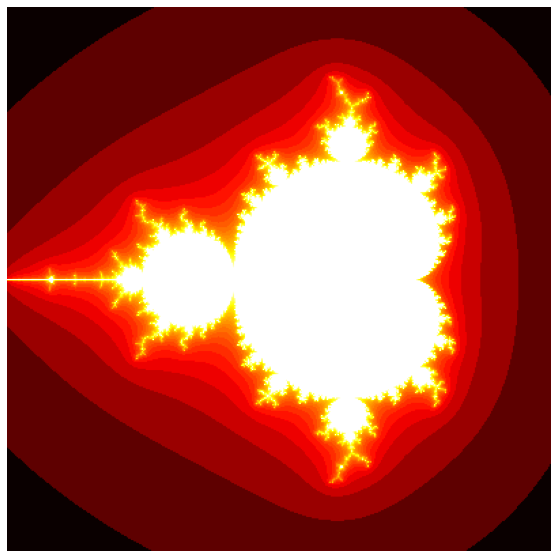

In [104]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(np.log(m0), cmap=plt.cm.hot)
ax.set_axis_off()

In [105]:
%timeit mandelbrot_python(size, iterations)

2.86 s ± 245 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


This takes quite a while. Lucky us that we did not use a higher number in `size` and `iteration`. Let's speed this up. The first take is always on `numpy`. Numpy is faster than pure Python because under the hood, its vector structure gets translated to Fortran, which is compiled code. 

Let's give this a go. The next two chuncs of code are a vectorized version of our `mandelbrot` function. You don't need to understand this in detail yet.

In [106]:
## initialize the set of pixels
def initialize(size):
    x, y = np.meshgrid(np.linspace(-2, 1, size),
                       np.linspace(-1.5, 1.5, size))
    c = x + 1j * y
    z = c.copy()
    m = np.zeros((size, size))
    return c, z, m

In [107]:
## function to iterate on the pixel
def mandelbrot_numpy(c, z, m, iterations):
    for n in range(iterations):
        indices = np.abs(z) <= 10
        z[indices] = z[indices] ** 2 + c[indices]
        m[indices] = n

In [108]:
%%timeit -n1 -r10 c, z, m = initialize(size)
mandelbrot_numpy(c, z, m, iterations)

69.9 ms ± 8.33 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


That is definitely faster. But we had to vectorize our code to gain from the speed advantage of `numpy`. And we can even go beyond this benchmark, by compiling our own code. `numba` does this for us.

In [109]:
from numba import jit

The dark magic lies alone in the small operator `@jit`:

In [110]:
@jit # NOTE: this is the only difference!
def mandelbrot_numba(size, iterations):
    m = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            c = (-2 + 3. / size * j +
                 1j * (1.5 - 3. / size * i))
            z = 0
            for n in range(iterations):
                if np.abs(z) <= 10:
                    z = z * z + c
                    m[i, j] = n
                else:
                    break
    return m

In [111]:
%timeit mandelbrot_numba(size, iterations)

14.4 ms ± 1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Using `@jit` does not require any special editions to your function. It discovers automatically which parts of your function can be "jitted" - that means, just-in-time compiled - and what not. We can be even faster if we know that all parts of our function can be jitted by using the numba nopython mode:

In [112]:
from numba import njit

The `@njit` operator just assumes that `numba` can compile your function.

In [113]:
@njit # NOTE: again, this is the only difference to before
def mandelbrot_njit(size, iterations):
    m = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            c = (-2 + 3. / size * j +
                 1j * (1.5 - 3. / size * i))
            z = 0
            for n in range(iterations):
                if np.abs(z) <= 10:
                    z = z * z + c
                    m[i, j] = n
                else:
                    break
    return m

In [114]:
%timeit mandelbrot_njit(size, iterations)

14.2 ms ± 1.51 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
